# **Tensorflow Distributions Summary**

## Table of Content


- 1. [Univariate Distributions](#univariate_distributions)
- 2. [Multivariate Distributions](#multivariate_distributions)
- 3. [The Independent Distribution](#the_independent_distribution)
- 4. [Sampling and log probs](#sampling_and_log_probs)
- 5. [Trainable Distributions](#trainable_distributions)

## 1. **Univariate distributions**

In [62]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_probability as tfp


print("TF version:", tf.__version__)
print("TFP version:", tfp.__version__)

tfd = tfp.distributions
tf.random.set_seed(42)

TF version: 2.20.0
TFP version: 0.25.0


In [63]:
# Create a normal distribution from Tensorflow Distributions

normal = tfd.Normal(loc=0, scale=1)

In [64]:
# Sample from the chosen distribution...

normal.sample()

<tf.Tensor: shape=(), dtype=float32, numpy=0.32746851444244385>

In [65]:
# Sample multiple times

normal.sample(10)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 8.4224582e-02, -8.6090374e-01,  3.7812304e-01, -5.1962738e-03,
       -4.9453196e-01,  6.1781919e-01, -3.3082047e-01, -1.3840806e-03,
       -4.2373410e-01, -1.3872087e+00], dtype=float32)>

In [66]:
# Obtain value of probability's density
normal.prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.3989422917366028>

In [67]:
# Obtain value of logprobability
normal.log_prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.9189385175704956>

In [68]:
# Verify that this really is the log of the probability
np.log(normal.prob(0))

np.float32(-0.9189385)

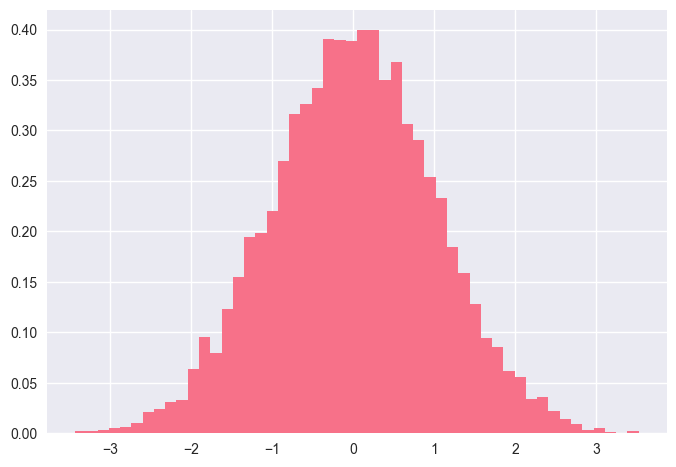

In [69]:
# Plot a histogram, approximating the density

plt.hist(normal.sample(10000), bins=50, density=True)
plt.show()

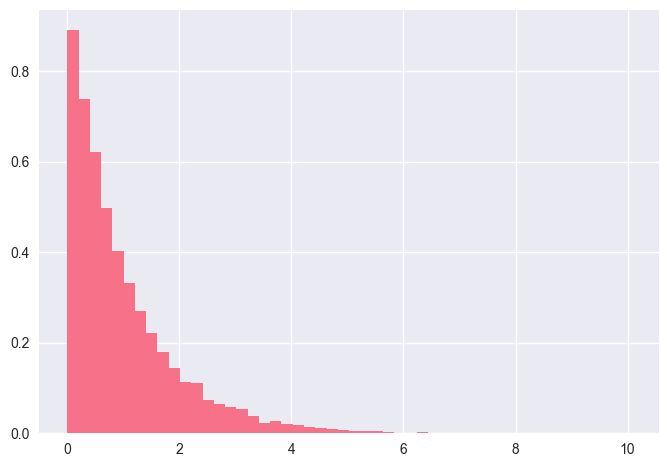

In [70]:
# Exponential distribution
exponential = tfd.Exponential(rate=1)

plt.hist(exponential.sample(10000), bins=50, density=True)
plt.show()

In [71]:
# Sample as before

exponential.sample(10)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.1631554 , 0.7399262 , 0.90844756, 0.29854068, 0.32811037,
       3.716206  , 0.4915939 , 1.2828436 , 2.0139854 , 1.2868103 ],
      dtype=float32)>

In [72]:
# Create a Bernoulli distribution (discrete)

bernoulli = tfd.Bernoulli(probs=0.8)
bernoulli.sample(20)

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0],
      dtype=int32)>

### 1.1 A word of caution on discrete distributions

In [73]:
# Calculate Bernoulli prob and see that 0.5 and -1 do not give the correct probability!

for k in [0,0.5,1,-1]:
    print('prob result {} for k = {} '.format(bernoulli.prob(k), k))

prob result 0.19999998807907104 for k = 0 
prob result 0.3999999761581421 for k = 0.5 
prob result 0.800000011920929 for k = 1 
prob result 0.04999999701976776 for k = -1 


In [74]:
# Replicate the scores to see what is occurring under the hood

def my_bernoulli(p_sucess, k):
    return np.power(p_sucess,k)*np.power((1-p_sucess),(1-k))

In [75]:
# Evaluate it as before

for k in [0,0.5,1,-1]:
    print('prob result {} for k = {} '.format(my_bernoulli(p_sucess=0.8, k=k), k))

prob result 0.19999999999999996 for k = 0 
prob result 0.3999999999999999 for k = 0.5 
prob result 0.8 for k = 1 
prob result 0.049999999999999975 for k = -1 


### 1.2 Work with batch distributions

In [76]:
# Create a batched Bernoulli distribution

bernoulli_batch = tfd.Bernoulli(probs=[0.1, 0.25, 0.5, 0.75, 0.9])
bernoulli_batch

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[5] event_shape=[] dtype=int32>

In [77]:
# Sample from it, noting the shape

bernoulli_batch.sample(5)

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[1, 0, 1, 1, 1],
       [0, 0, 0, 1, 1],
       [0, 1, 1, 1, 1],
       [0, 0, 0, 1, 1],
       [0, 0, 1, 1, 1]], dtype=int32)>

In [78]:
# Use a batch shape with higher rank

probs = [[[0.5, 0.5], 
          [0.8, 0.3], 
          [0.25, 0.75]]]
bernoulli_batch_2D = tfd.Bernoulli(probs=probs)
bernoulli_batch_2D

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[1, 3, 2] event_shape=[] dtype=int32>

In [79]:
# Sample from this batch of distributions

bernoulli_batch_2D.sample(5)

<tf.Tensor: shape=(5, 1, 3, 2), dtype=int32, numpy=
array([[[[0, 1],
         [0, 0],
         [0, 1]]],


       [[[1, 1],
         [0, 0],
         [1, 1]]],


       [[[1, 1],
         [1, 1],
         [1, 1]]],


       [[[1, 0],
         [1, 0],
         [0, 0]]],


       [[[1, 1],
         [1, 1],
         [0, 0]]]], dtype=int32)>

In [80]:
# Determine probabilities from this batch distribution

bernoulli_batch_2D.prob([[[1, 0], 
                         [0, 0], 
                         [1, 1]]])

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[0.5 , 0.5 ],
        [0.2 , 0.7 ],
        [0.25, 0.75]]], dtype=float32)>

## 2. **Multivariate Distributions**


### 2.1 Basic multivariate distributions

In [81]:
# Define 2D multivariate Gaussian with diagonal covariance matrix

normal_diag = tfd.MultivariateNormalDiag(loc=[0, 1], scale_diag=[1, 2])  # scale_diag=[1, 20]) we can change the shape by altering the mean and SD
normal_diag

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

In [82]:
# Sample from it

normal_diag.sample(10)

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[-1.588346  ,  2.6131206 ],
       [-0.2999747 , -0.12225258],
       [-0.05375826,  2.6071696 ],
       [ 0.48094264, -1.7809594 ],
       [ 1.5665619 ,  2.143052  ],
       [ 0.88378227,  2.041051  ],
       [-0.6169611 ,  4.1485567 ],
       [ 1.8390492 ,  2.7244444 ],
       [-0.7466323 ,  1.8035475 ],
       [ 1.2949302 ,  1.7941597 ]], dtype=float32)>

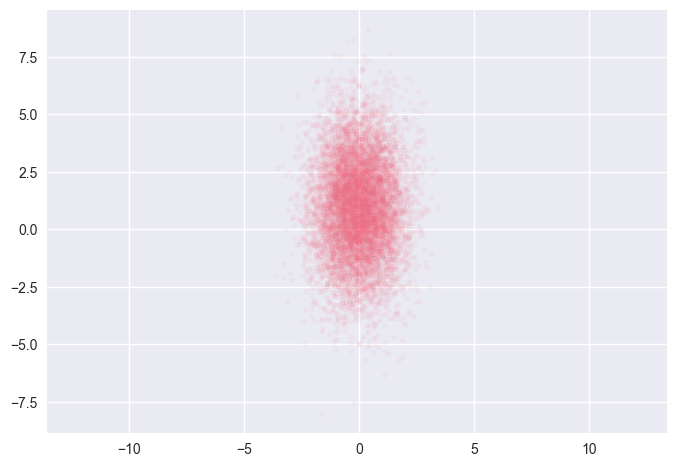

In [83]:
# Make a plot

plt_sample = normal_diag.sample(10000)
plt.scatter(plt_sample[:, 0], plt_sample[:, 1], marker='.', alpha=0.05)
plt.axis('equal')
plt.show()

### 2.2 Batches of multivariate distributions

In [84]:
# Create three "batches" of multivariate normals

normal_diag_batch = tfd.MultivariateNormalDiag(loc=[[0, 0], [0, 0], [0, 0]],
                                               scale_diag=[[1, 2], [2, 1], [2, 2]])
normal_diag_batch

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[3] event_shape=[2] dtype=float32>

In [85]:
# Sample from it

samples =normal_diag_batch.sample(5)
samples

<tf.Tensor: shape=(5, 3, 2), dtype=float32, numpy=
array([[[ 0.99859   ,  1.5756832 ],
        [ 0.662742  , -0.27534547],
        [ 0.57187337, -1.9846029 ]],

       [[ 0.2979308 ,  1.1563832 ],
        [-0.5698211 , -0.4947985 ],
        [-0.07057628, -3.043311  ]],

       [[-1.1788069 , -3.3961847 ],
        [-1.0331583 ,  1.2703197 ],
        [ 0.7376702 , -2.1564586 ]],

       [[ 0.14050497,  1.277927  ],
        [ 1.8521194 , -0.11663292],
        [ 1.1731373 , -0.3484918 ]],

       [[-1.4645698 , -1.9902434 ],
        [ 3.1401815 ,  1.3841541 ],
        [ 0.9459144 , -1.2755493 ]]], dtype=float32)>

In [86]:
# Compute log probs

normal_diag_batch.log_prob(samples)

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-3.3399625, -2.623835 , -3.7573824],
       [-2.7425585, -2.694024 , -4.382512 ],
       [-4.667576 , -3.4713073, -3.8734803],
       [-2.7450323, -2.966619 , -3.4113836],
       [-4.0986404, -4.721558 , -3.539394 ]], dtype=float32)>

In [87]:
# Create a sample for a plot -- notice the shape

plt_sample_batch = normal_diag_batch.sample(10000)
plt_sample_batch.shape

TensorShape([10000, 3, 2])

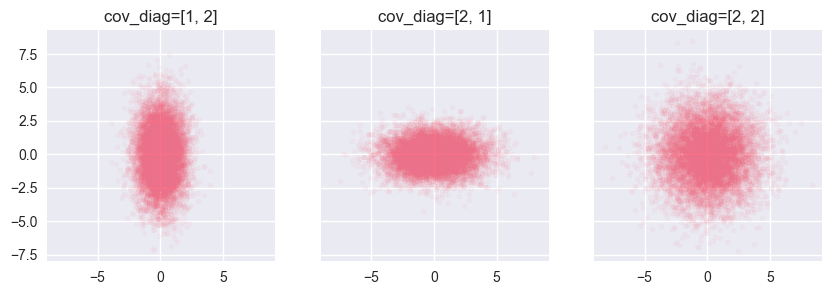

In [88]:
# Plot samples from the batched multivariate Gaussian

fig, axs = (plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10, 3)))
titles = ['cov_diag=[1, 2]','cov_diag=[2, 1]', 'cov_diag=[2, 2]']

for i, (ax, title) in enumerate(zip(axs,titles)):
    samples = plt_sample_batch[:,i,:] #take the ith batch [samples x event_shape]
    ax.scatter(samples[:, 0], samples[:, 1], marker='.', alpha=0.05)
    ax.set_title(title)
plt.show()

## 3. **The Independent Distribution**

In [89]:
# Start by defining a batch of two univariate Gaussians, then
# combine them into a bivariate Gaussian with independent components

locs = [-1., 1]
scales = [0.5, 1.]
batch_of_normals = tfd.Normal(loc=locs, scale=scales)

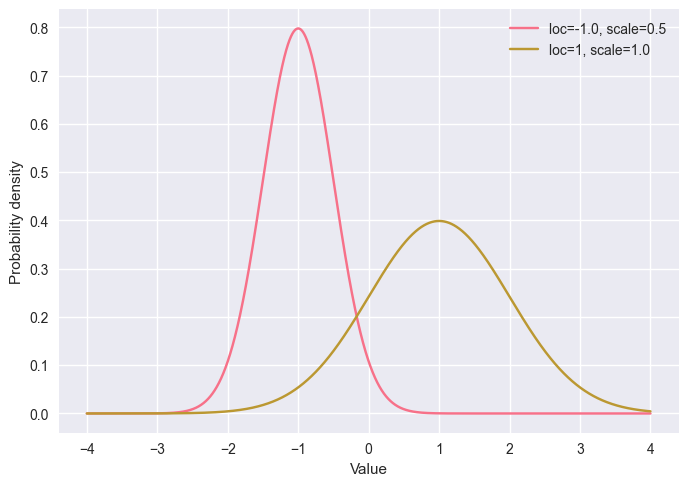

In [90]:
# Univariate density functions
import seaborn as sns

t = np.linspace(-4, 4, 10000)
densities = batch_of_normals.prob(np.repeat(t[:, np.newaxis], 2, axis=1)) # each column is a vector of densities for one distn

# Fix: Use x= and y= named parameters in lineplot
sns.lineplot(x=t, y=densities[:, 0], label='loc={}, scale={}'.format(locs[0], scales[0]))
sns.lineplot(x=t, y=densities[:, 1], label='loc={}, scale={}'.format(locs[1], scales[1])) # Also fixed index for second plot
plt.ylabel('Probability density')
plt.xlabel('Value')
plt.legend()
plt.show()

In [91]:
# Check their batch_shape and event_shape

batch_of_normals

<tfp.distributions.Normal 'Normal' batch_shape=[2] event_shape=[] dtype=float32>

In [92]:
# Use Independent to convert the batch shape to the event shape

bivariate_normal_from_Independent = tfd.Independent(batch_of_normals,
                                                    reinterpreted_batch_ndims=1)

In [93]:
# Note that dimension from batch_shape has shifted to event_shape

bivariate_normal_from_Independent

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[] event_shape=[2] dtype=float32>

In [94]:
# Create a plot showing joint density contours and marginal density functions

samples = bivariate_normal_from_Independent.sample(10000)
x1 = samples[:, 0]
x2 = samples[:, 1]
sns.jointplot(x1, x2, kind="kde", space=0, color='b', xlim=[-4, 4], ylim=[-4, 4])

TypeError: jointplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 5 keyword-only arguments) were given

In [ ]:
# Use MultivariateNormalDiag to create the equivalent distribution
# Note that diagonal covariance matrix => no correlation => independence (for the multivariate normal distribution)

bivariate_normal_from_Multivariate = tfd.MultivariateNormalDiag(loc=locs,
                                                                scale_diag=scales)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


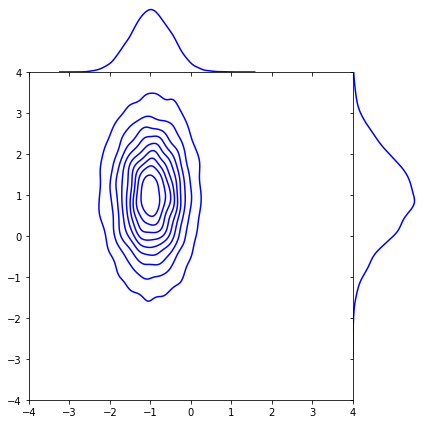

In [ ]:
# Plot the joint density function of bivariate_normal_from_Independent
# Refer back to bivariate_normal_from_Independent to show that the plot is the same
# Summarise how Independent has been used

samples = bivariate_normal_from_Multivariate.sample(10000)
x1 = samples[:, 0]
x2 = samples[:, 1]
sns.jointplot(x1, x2, kind="kde", space=0, color='b', xlim=[-4, 4], ylim=[-4, 4])

### 3.1 Shifting batch dimensions to event dimensions using `reinterpreted_batch_ndims`

In [ ]:
# Demonstrate use of reinterpreted_batch_ndims
# By default all batch dims except the first are transferred to event dims

loc_grid = [[-100., -100.],
            [100., 100.],
            [0., 0.]]
scale_grid = [[1., 10.],
              [1., 10.],
              [1., 1.]]

normals_batch_3by2_event_1 = tfd.Normal(loc=loc_grid, scale=scale_grid)

In [ ]:
# Highlight batch_shape

normals_batch_3by2_event_1

<tfp.distributions.Normal 'Normal' batch_shape=[3, 2] event_shape=[] dtype=float32>

In [ ]:
# We now have a batch of 3 bivariate normal distributions,
# each parametrised by a column of our original parameter grid

normals_batch_3_event_2 =tfd.Independent(normals_batch_3by2_event_1)
normals_batch_3_event_2

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[3] event_shape=[2] dtype=float32>

In [ ]:
# Evaluate log_prob

normals_batch_3_event_2.log_prob(value=[[-10., 10,],
                                        [100., 100],
                                        [1., 1.]])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-4.1146406e+03, -4.1404624e+00, -2.8378770e+00], dtype=float32)>

In [ ]:
# Can reinterpret _all_ batch dimensions as event dimensions

normals_batch_1_event_3by2 = tfd.Independent(normals_batch_3by2_event_1,
                                             reinterpreted_batch_ndims=2)
normals_batch_1_event_3by2

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[] event_shape=[3, 2] dtype=float32>

In [ ]:
# Take log_probs 

normals_batch_1_event_3by2.log_prob(value=[[-10., 10,],
                                           [100., 100],
                                           [1., 1.]])

<tf.Tensor: shape=(), dtype=float32, numpy=-4121.619>

## 4. **Sampling and log probs**

In [ ]:
# Make Multivariate Distribution

normal_distributions = tfd.MultivariateNormalDiag(loc=[[0.5, 1], [0.1, 0], [0, 0.2]],
                                 scale_diag=[[2, 3], [1, 3], [4, 4]])
normal_distributions

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[3] event_shape=[2] dtype=float32>

In [ ]:
# Sample

normal_distributions.sample(5)

<tf.Tensor: shape=(5, 3, 2), dtype=float32, numpy=
array([[[-0.61642456, -2.6508875 ],
        [-0.02484179, -0.58626443],
        [-2.3840659 , -2.2478259 ]],

       [[-1.3702699 ,  9.627965  ],
        [ 0.34466887, -2.335009  ],
        [-0.6538167 ,  5.7416673 ]],

       [[-2.086178  ,  4.7825446 ],
        [ 1.154147  , -4.501431  ],
        [-4.3120627 ,  0.32013714]],

       [[-2.5057547 ,  2.4638143 ],
        [-0.11568717, -5.0724864 ],
        [ 0.63433516, -0.52497053]],

       [[ 1.380878  ,  1.7464799 ],
        [ 0.11383934,  1.1534938 ],
        [-0.91430813,  2.0012252 ]]], dtype=float32)>

In [ ]:
# Multivariate Normal batched Distribution
# We are broadcasting batch shapes of `loc` and `scal_diag` 
# against each other

loc = [[[0.3, 1.5, 1.], [0.2, 0.4, 2.8]],
        [[2., 2.3, 8], [1.4, 1, 1.3]]]
scale_diag = [0.4, 1., 0.7]
normal_distributions = tfd.MultivariateNormalDiag(loc=loc, scale_diag=scale_diag)
normal_distributions

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[2, 2] event_shape=[3] dtype=float32>

In [ ]:
# Use independent to move part of the batch shape

ind_normal_distributions = tfd.Independent(normal_distributions,
                                           reinterpreted_batch_ndims=1)
ind_normal_distributions

<tfp.distributions.Independent 'IndependentMultivariateNormalDiag' batch_shape=[2] event_shape=[2, 3] dtype=float32>

In [ ]:
# Draw some samples

samples = ind_normal_distributions.sample(5)
samples.shape

TensorShape([5, 2, 2, 3])

In [ ]:
# `[B, E]` shaped input

inp = tf.random.uniform((2, 2, 3))
ind_normal_distributions.log_prob(inp)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-11.756409, -66.098785], dtype=float32)>

In [ ]:
# `[E]` shaped input (broadcasting over batch size)

inp = tf.random.uniform((2, 3))
ind_normal_distributions.log_prob(inp)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-11.850761, -76.12896 ], dtype=float32)>

In [ ]:
#`[S, B, E]` shaped input (broadcasting over samples)

inp = tf.random.uniform((9, 2, 2, 3))
ind_normal_distributions.log_prob(inp)

<tf.Tensor: shape=(9, 2), dtype=float32, numpy=
array([[ -8.763502 , -74.403946 ],
       [ -8.963752 , -78.71576  ],
       [-10.053402 , -67.10482  ],
       [-10.113637 , -70.84384  ],
       [ -8.458472 , -77.99654  ],
       [-13.988488 , -74.964966 ],
       [ -7.66702  , -65.602325 ],
       [-10.51793  , -65.675446 ],
       [-11.9138565, -72.61048  ]], dtype=float32)>

In [ ]:
# `[S, b, e]` shaped input, where [b, e] is broadcastable over [B, E]

inp = tf.random.uniform((5, 1, 2, 1))
ind_normal_distributions.log_prob(inp)

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[ -9.843089 , -61.68399  ],
       [-10.387953 , -61.109745 ],
       [ -9.2092285, -71.7383   ],
       [-12.003781 , -83.812454 ],
       [ -9.123208 , -68.52439  ]], dtype=float32)>

## 5. **Trainable Distributions**

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score

In [ ]:
# Define an exponential distribution

exponential = tfd.Exponential(rate=0.3, name='exp')

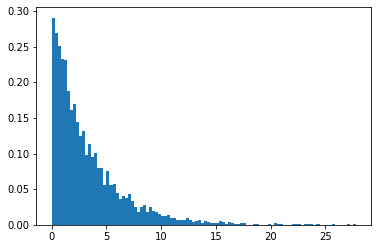

In [ ]:
# Plot

plt.hist(exponential.sample(5000), bins=100, density=True)
plt.show()

In [ ]:
# Define an exponential distribution with a trainable rate parameter

exp_train = tfd.Exponential(rate=tf.Variable(1., name='rate'), name='exp_train')
exp_train.trainable_variables

(<tf.Variable 'rate:0' shape=() dtype=float32, numpy=1.0>,)

In [ ]:
# Define the negative log likelihood

def nll(x_train, distribution):
    return -tf.reduce_mean(distribution.log_prob(x_train))


In [ ]:
# Define a function to compute the loss and gradients

@tf.function
def get_loss_and_grads(x_train, distribution):
    with tf.GradientTape() as tape:
        tape.watch(distribution.trainable_variables)
        loss = nll(x_train, distribution)
    grads = tape.gradient(loss, distribution.trainable_variables)
    return loss, grads

In [ ]:
# Optimize

def exponential_dist_optimisation(data, distribution):

    # Keep results for plotting
    train_loss_results = []
    train_rate_results = []
    
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.05)

    num_steps = 10

    for i in range(num_steps):
        loss, grads = get_loss_and_grads(data, distribution)
        optimizer.apply_gradients(zip(grads, distribution.trainable_variables))

        rate_value = distribution.rate.value()
        train_loss_results.append(loss)
        train_rate_results.append(rate_value)
        print("Step {:03d}: Loss: {:.3f}: Rate: {:.3f}".format(i, loss, rate_value))
        
    return train_loss_results, train_rate_results

In [ ]:
# Get some data and train

sampled_data = exponential.sample(5000)
train_loss_results, train_rate_results = exponential_dist_optimisation(data=sampled_data, distribution=exp_train)

Step 000: Loss: 3.392: Rate: 0.880
Step 001: Loss: 3.114: Rate: 0.768
Step 002: Loss: 2.868: Rate: 0.663
Step 003: Loss: 2.660: Rate: 0.569
Step 004: Loss: 2.494: Rate: 0.487
Step 005: Loss: 2.372: Rate: 0.420
Step 006: Loss: 2.292: Rate: 0.370
Step 007: Loss: 2.249: Rate: 0.335
Step 008: Loss: 2.230: Rate: 0.315
Step 009: Loss: 2.224: Rate: 0.304


In [ ]:
# Predicted value for the rate parameter

pred_value = exp_train.rate.numpy()
exact_value = exponential.rate.numpy()

print("Exact rate: ", exact_value)
print("Pred rate:  ", pred_value)

Exact rate:  0.3
Pred rate:   0.30404457


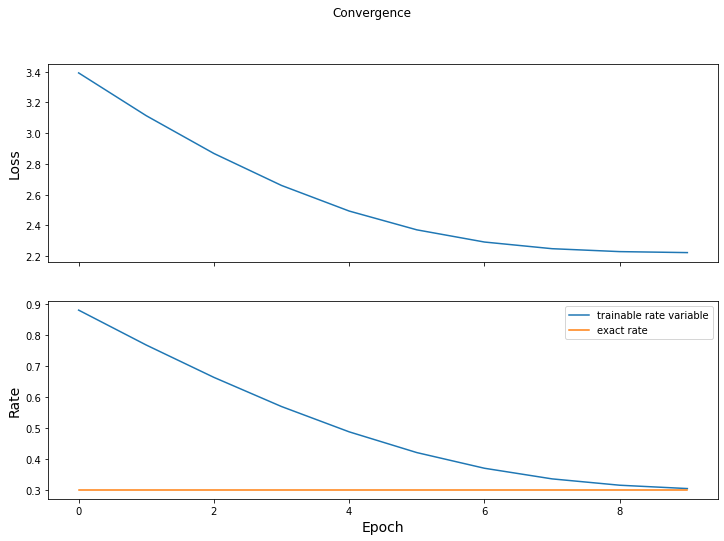

In [ ]:
# Plot to see the convergence of the estimated and true parameters

tensor_exact_value = tf.constant(exact_value, shape=[len(train_rate_results)])

fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Convergence')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Rate", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_rate_results, label='trainable rate variable')
axes[1].plot(tensor_exact_value, label='exact rate')
axes[1].legend()
plt.show()

In [ ]:
# Making a function get_data which:
#   1) Fetches the 20 newsgroup dataset
#   2) Performs a word count on the articles and binarizes the result
#   3) Returns the data as a numpy matrix with the labels

def get_data(categories):

    newsgroups_train_data = fetch_20newsgroups(data_home='/content/20_Newsgroup_Data',
                                               subset='train', categories=categories)
    newsgroups_test_data = fetch_20newsgroups(data_home='/content/20_Newsgroup_Data',
                                              subset='test', categories=categories)

    n_documents = len(newsgroups_test_data['data'])
    count_vectorizer = CountVectorizer(input='content', binary=True,max_df=0.25, min_df=1.01/n_documents) 
    train_binary_bag_of_words = count_vectorizer.fit_transform(newsgroups_train_data['data']) 
    test_binary_bag_of_words = count_vectorizer.transform(newsgroups_test_data['data']) 

    return (train_binary_bag_of_words.todense(), newsgroups_train_data['target']),  (test_binary_bag_of_words.todense(), newsgroups_test_data['target'])


In [ ]:
# Defining a function to conduct laplace smoothing. This adds a base level of probability for a given feature
# to occur in every class.

def laplace_smoothing(labels, binary_data, n_classes):
    # Compute the parameter estimates (adjusted fraction of documents in class that contain word)
    n_words = binary_data.shape[1]
    alpha = 1 # parameters for Laplace smoothing
    theta = np.zeros([n_classes, n_words]) # stores parameter values - prob. word given class
    for c_k in range(n_classes): # 0, 1, ..., 19
        class_mask = (labels == c_k)
        N = class_mask.sum() # number of articles in class
        theta[c_k, :] = (binary_data[class_mask, :].sum(axis=0) + alpha)/(N + alpha*2)

    return theta

In [ ]:
# Now we will do a function that given the feature occurence counts returns a Bernoulli distribution of 
# batch_shape=number of classes and event_shape=number of features.

def make_distributions(probs):
    batch_of_bernoullis = tfd.Bernoulli(probs=probs) # shape (n_classes, n_words)
    dist = tfd.Independent(batch_of_bernoullis, reinterpreted_batch_ndims=1)
    return dist

In [ ]:
# Function which computes the prior probability of every class based on frequency of occurence in 
# the dataset

def class_priors(n_classes, labels):
    counts = np.zeros(n_classes)
    for c_k in range(n_classes):
        counts[c_k] = np.sum(np.where(labels==c_k, 1, 0))
    priors = counts / np.sum(counts)
    print('The class priors are {}'.format(priors))
    return priors

In [ ]:
# The final function predict_sample which given the distribution, a test sample, and the class priors:
#   1) Computes the class conditional probabilities given the sample
#   2) Forms the joint likelihood
#   3) Normalises the joint likelihood and returns the log prob

def predict_sample(dist, sample, priors):
    cond_probs = dist.log_prob(sample)
    joint_likelihood = tf.add(np.log(priors), cond_probs)
    norm_factor = tf.math.reduce_logsumexp(joint_likelihood, axis=-1, keepdims=True)
    log_prob = joint_likelihood - norm_factor

    return log_prob

In [ ]:
# Now we learn the distribution using gradient tape

def make_distribution_withGT(data, labels, nb_classes):

    class_data = []
    train_vars = []
    distributions = []
    for c in range(nb_classes):
        train_vars.append(tf.Variable(initial_value=np.random.uniform(low=0.01, high =0.1, size=data.shape[-1])))
        distributions.append(tfd.Bernoulli(probs=train_vars[c]))
        class_mask = (labels == c)
        class_data.append(data[class_mask, :])

    for c_num in range(0,nb_classes):
        optimizer = tf.keras.optimizers.Adam()
        print('\n%-------------------%')
        print('Class ', c_num)
        print('%-------------------%')

        for i in range(0,100):
            loss, grads = get_loss_and_grads(class_data[c_num], distributions[c_num])
            if(i%10==0):
                print('iter: {} loss: {}'.format(i, loss))
            optimizer.apply_gradients(zip(grads, distributions[c_num].trainable_variables))
            eta = 1e-3
            clipped_probs = tf.clip_by_value(distributions[c_num].trainable_variables,
                                             clip_value_min=eta, clip_value_max=1)
            train_vars[c_num] = tf.squeeze(clipped_probs)
            

    dist = tfd.Bernoulli(probs=train_vars)
    dist = tfd.Independent(dist,reinterpreted_batch_ndims=1)

    print(dist)

    return dist


In [ ]:
# Make the same Naive Bayes classifier we did last tutorial

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

(train_data, train_labels), (test_data, test_labels) = get_data(categories)

smoothed_counts = laplace_smoothing(labels=train_labels, binary_data=train_data, n_classes=len(categories))

priors = class_priors(n_classes=len(categories), labels=train_labels)
tf_dist = make_distributions(smoothed_counts)

The class priors are [0.2359882  0.28711898 0.29154376 0.18534907]


In [ ]:
# Now train the distributions with gradient tape

GT_dist = make_distribution_withGT(data=train_data, labels=train_labels, nb_classes=4)


%-------------------%
Class  0
%-------------------%
iter: 0 loss: 0.07832579152423366
iter: 10 loss: 0.06894347305528033
iter: 20 loss: 0.060222996342706836
iter: 30 loss: 0.05218120592196705
iter: 40 loss: 0.044759031548345145
iter: 50 loss: 0.0379018550873754
iter: 60 loss: 0.03155126632645766
iter: 70 loss: 0.02566911732741816
iter: 80 loss: 0.020219924339709733
iter: 90 loss: 0.0151572347232354

%-------------------%
Class  1
%-------------------%
iter: 0 loss: 0.07127955241503989
iter: 10 loss: 0.061937990769672026
iter: 20 loss: 0.05314094638202285
iter: 30 loss: 0.0449779596289782
iter: 40 loss: 0.03741778676096856
iter: 50 loss: 0.030434644494345044
iter: 60 loss: 0.023988602031351454
iter: 70 loss: 0.018051947992478605
iter: 80 loss: 0.012572028391125102
iter: 90 loss: 0.007491437417768517

%-------------------%
Class  2
%-------------------%
iter: 0 loss: 0.0783904388365927
iter: 10 loss: 0.06930189904430697
iter: 20 loss: 0.06093254284122168
iter: 30 loss: 0.05331069276547

In [ ]:
# Compare the two results

for dist in [GT_dist,tf_dist]:
    probabilities = []
    for sample, label in zip(test_data, test_labels):
        probabilities.append(predict_sample(dist, sample, priors))

    probabilities = np.asarray(probabilities)
    predicted_classes = np.argmax(probabilities, axis =-1)
    print('f1 ', f1_score(test_labels, predicted_classes, average='macro'))

f1  0.8279055960457952
f1  0.7848499112849504
